In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Метод наименьших квадратов
Производились измерения функционральной зависимости. При измерениях есть шум. Зная характер зависисти, подобрать коэффициенты

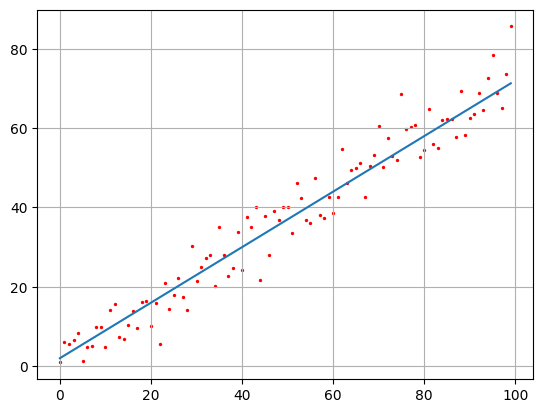

In [2]:
X = np.arange(100)
y = X * 0.7 + np.random.normal(0, 5, 100) + 2
plt.scatter(X, y, s=2, c='r')
plt.plot(X, X * 0.7 + 2)
plt.grid()


В данном случае зависимость $f(x)=kx+b$, нужно найти k и b

Как оценить погрешность? MSE, MAE, минимум максимальной по модулю ошибки $E=max|y_i-f(x_i)|$

В данном методе берукт квадрат

Дальше про то что шум обычно распределён по Гауссовскому распределению
$$\omega(y_i|f(x_i))=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(y_i-f(x_i))^2}{2\sigma^2}} $$

А давайте зпишем произведение всех наблюдений?
$$\prod_{i=1}^{N}\omega(y_i|f(x_i))=\prod_{i=1}^{N}\frac{1}{\sigma\sqrt{2\pi}}exp(-\frac{(y_i-f(x_i))^2}{2\sigma^2}) $$

Справой стороны мы можем менять только $f(x_i)$. Если приблизить его к $y_i$ то мы максимизируем значение произведения плотностей, т.е. попадём в точки соответствующей нужной кривой. Или же
$$E=\sum_{i=1}^{N}{y_i-f(x_i))^2}\rightarrow min$$

Дальше производные... в обще, все известно

em}em}n*}
$$$$

$$
\begin{equation}
\begin{cases}
\sum_{i=1}^{N}{(y_i-kx_i-b)\cdot x_i} \\
\sum_{i=1}^{N}{(y_i-kx_i-b)\cdot 1} \\
\end{cases}
\end{equation}
$$
$$
\begin{equation}
\begin{cases}
\sum_{i=1}^{N}{y_i\cdot x_i} - k \cdot \sum_{i=1}^{N}{x_i^2} - b \cdot \sum_{i=1}^{N}{x_i} = 0 \\
\sum_{i=1}^{N}{y_i}-k\cdot \sum_{i=1}^{N}{x_i} - b \cdot N = 0 \\
\end{cases}
\end{equation}
$$
Разделим всё на N и получим

$\alpha_{1,1}^{*}=\frac{1}{N}\sum_{i=1}^{N}y_ix_i$ - первый смешанный начальный момент

$\alpha_{2}^{*}=\frac{1}{N}\sum_{i=1}^{N}x_i^2$ - второй начальный момент

$m_{x}^{*}=\frac{1}{N}\sum_{i=1}^{N}x_i$ - матожидание для х

$m_{y}^{*}=\frac{1}{N}\sum_{i=1}^{N}y_i$ - дисперсия у

Звездочки означают что значения получены из эксперимента

Первый момент соответствует математическому ожиданию случайной величины, он показывает относительное расположение распределения на числовой прямой.

Второй момент соответствует дисперсии распределения, он показывает разброс вокруг среднего значения.

Третий момент при нормализации является числовой характеристикой симметрии распределения.

Четвертый момент соответствует коэффициенту эксцесса распределения, он показывает меру тяжести краев распределения или же меру остроты

$$
\begin{equation}
\begin{cases}
\alpha_{1,1}^{*} - k\alpha_{2}^{*}-bm_x^* \\
m_y^* - km_x^*-b=0\\
\end{cases}
\end{equation}
$$

$$k = \frac{\alpha_{1,1}^{*}-m_y^*m_x^*}{\alpha_{2}^{*} - (m_y^*)^2}$$
$$b=m_y^*-k \cdot m_x^*$$ пика.

По аналогии для квадратических

k_pred=0.506
b_pred=2.287


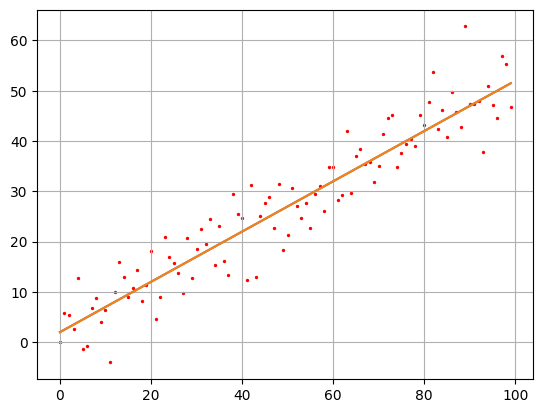

In [3]:
N = 100
sigma = 5
k = 0.5
b = 2

X = np.arange(N)
f = X * k + b
y = f + np.random.normal(0, sigma, N)

m_x = 1 / N * sum(X)
m_y = 1 / N * sum(y)
alpha_11 = 1 / N * np.dot(X.T, y) 
alpha_2 = 1 / N * np.dot(X.T, X.T)

k_pred = (alpha_11 - m_x * m_y) / (alpha_2 - m_x ** 2)
b_pred = m_y - k * m_x
f_pred = k * X + b
print(f'{k_pred=:.3f}')
print(f'{b_pred=:.3f}')

plt.scatter(X, y, s=2, c='r')
plt.plot(X, f)
plt.plot(X, f_pred)
plt.grid()

# Градиентный спуск
Ищем минимум функции. Может применяться для любой функции
$$x_{n+1} = x_n - \frac{df(x)}{dx}, n=0,1,2,3\dots$$
$$градиент - \frac{df(x)}{dx}\cdot i_1 \text{($i_1$ в данном случае ось $x$)}$$
$$x_{n+1} = x_n - \lambda \cdot \frac{df(x)}{dx}, n=0,1,2,3\dots \text{($\lambda$ - шаг сходимости)}$$

Любят попадать в локальные минимумы

In [4]:
%matplotlib tk

In [5]:
import time
def f(x):
    return x ** 2 - 5 * x + 5

def df(x):
    return 2*x - 5

N = 20
xx = 0
lmd = 0.9

x_plt = np.arange(0, 5.0, 0.1)
f_plt = list(map(f, x_plt))

plt.ion()
fig, ax = plt.subplots()
ax.grid()

ax.plot(x_plt, f_plt)
point = ax.scatter(xx, f(xx), c='r')

mn = 100
for i in range(N):
    lmd = 1 / min(i + 1, 100)
    xx =xx - lmd * df(xx)
    point.set_offsets([xx, f(xx)])

    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.02)
    
plt.ioff()
print(f'{xx=:.3f}')
ax.scatter(xx, f(xx), c='b')
plt.show()


xx=2.500


In [6]:
import time
def f(x):
    return np.sin(x) + 0.5 * x

def df(x):
    return np.cos(x) + 0.5

N = 20
xx = 2
lmd = 0.9

x_plt = np.arange(-5.0, 5.0, 0.1)
f_plt = list(map(f, x_plt))

plt.ion()
fig, ax = plt.subplots()
ax.grid()

ax.plot(x_plt, f_plt)
point = ax.scatter(xx, f(xx), c='r')

mn = 100
for i in range(N):
    lmd = 1 / min(i + 1, 100)
    xx =xx - lmd * df(xx)
    point.set_offsets([xx, f(xx)])

    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.02)
    
plt.ioff()
print(f'{xx=:.3f}')
ax.scatter(xx, f(xx), c='b')
plt.show()


xx=0.467


In [7]:
%matplotlib inline

# Градиентный спуск для двух параметров

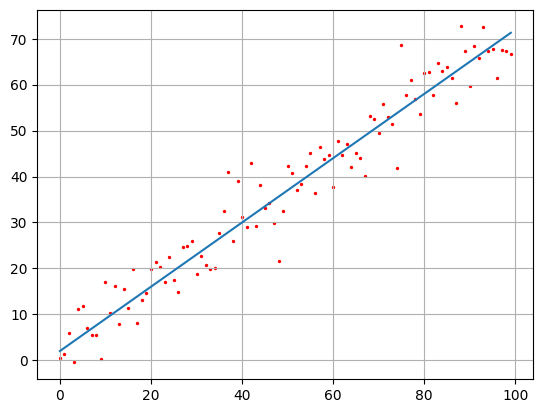

In [8]:
X = np.arange(100)
y = X * 0.7 + np.random.normal(0, 5, 100) + 2
plt.scatter(X, y, s=2, c='r')
plt.plot(X, X * 0.7 + 2)
plt.grid()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn
import time
from matplotlib.animation import ArtistAnimation

In [10]:
class Linreg():
    def __init__(X, y, step=0.1, patience=1e-8, iter=100000):
        self.X = X
        self.y = y
        self.step = step
        self.patience = patience
        self.iter = iter

    
    def fit():
        exam, feauters = self.X.shape
        self.w = np.zeros(feauters)
        for _ in range(self.iter):
            y_pred = X @ w
            delta = (y - y_pred) @ X / exam
            self.w -= self.step * delta
        return True

    def pred(X_):
        return X_ * w



# Марковские процессы в дискретном времени
<p>
<details>
  <summary>Теория</summary>


<p>
<details>
<summary>Определение случайного процесса</summary>

Количественно случайный процесс описывается случайной функцией, которая является его математической моделью. В литературе термин `”случайный процесс” часто используется в смысле случайной функции`. 

`Случайную функцию удобнее всего определить` через обобщение понятия случайной величины, которая была определена `как множество значений с заданной на нем вероятностной мерой.`
<p>
<details>
  <summary>Вероятностная мера</summary>
Вероятностная мера — это мера на множестве событий (подмножеств множества элементарных событий), принимающая значения от 0 до 1.

Значение 1 соответствует достоверному событию. Невозможное событие имеет вероятность 0.
</details>


**Определение 1**

`Случайная функция - это множество (ансамбль) функций с заданной на нем вероятностной мерой`. В результате эксперимента с некоторой вероятностью появляется одна из функций, которая называется реализацией. Поэтому множество функций иногда называют множеством реализаций. Эксперимент можно рассматривать как случайный выбор некоторой неслучайной функции из заданного множества функций.

**Определение 2**Случайная функция - это случайная величина, зависящая от параметра, в частности, от времени.

Случайная функция образуется совокупностью случайных величин, каждая из которых соответствует своему значению параметра t . Реализация случайной функции представляет собой реализацию случайных величин, количество которых может быть конечным или бесконечным в зависимости от того, какова область определения значений параметра t . Если зафиксировать некоторое значение параметра (аргумента) t , то случайная функция превращается в случайную величину, которая может принимать различные значения с некоторым законом распределения вероятностей. Эта случайная величина называется сечением случайной функции, соответствующим данному значению t.

В качестве примера рассмотрим рельеф местности, который в полярной системе координат описывается некоторой функцией f(r,), где радиус r и фаза  являются координатами некоторой точки на местности. Для заданной местности функция f(r,) является детерминированной. Однако ее можно рассматривать как случайную функцию одного из аргументов, если другой аргумент считать случайным параметром. Если случайным аргументом является фаза, т.е. направление, то рельеф, как функция радиуса, будет реализацией случайного функции. В данном случае, каждому значению фазы ставится в соответствие реализация случайной функции. Аналогично при случайном радиусе, реализацией случайного процесса будет изменение рельефа местности по окружности.

При описании рельефа поверхности моря необходимо вывести еще одну координату (параметр) - время. Тогда, в фиксированный момент времени, поверхность моря будет реализацией некоторого рельефа, который описывается функцией двух аргументов.

Случайная функция нескольких переменных называется случайным полем. Чаще всего, в качестве переменных выступают координаты пространства и времени
</details>


<p>
<details>
  <summary>Классификация случайных процессов</summary>

Случайные процессы по внешнему качественному описанию всех реализаций можно разделить на три группы: импульсные, флюктуационные и специального вида.

Импульсные процессы представляют собой последовательность одиночных импульсов, в общем случае разной формы следующие друг за другом через случайные промежутки времени.

Флюктуационные процессы (гладкий характер реализаций, большие выпады редки). Типичным примером является тепловой шум.

Квазидетермированные случайные процессы (со случайными параметрами) и все прочие процессы.

В зависимости от того, непрерывные или дискретные значения принимает случайная величина (t) и ее параметр t, различают следующие пять основных видов случайных процессов

а) непрерывный случайный процесс

б) дискретный случайный процесс

в) случайная последовательность

г) дискретная случайная последовательность

д) случайный точечный процесс

Случайный процесс общего вида ( t - непрерывно,  - непрерывно) в общем случае реализации могут иметь разрывы первого рода. Если разрывы отсутствуют, то процесс называется непрерывным.

Дискретный (разрывный) случайный процесс (t- непрерывно,  - дискретно). Реализациями этого процесса являются ступенчатые функции времени, которые имеют место, например, на выходах релейной системы автоматического регулирования или устройства, осуществляющего квантование сигналов по уровню.

Случайная последовательность общего типа ( t - дискретно,  - непрерывно). В качестве примера можно указать временные выборки из непрерывного случайного процесса.

Дискретная случайная последовательность (t- дискретно, - дискретно ).Процессы такого вида непосредственно встречаются на практике (случайное подбрасывание монеты, радиотелеграфия, радиолокация и т. д.) , а также могут быть получены квантованием по уровню и по времени непрерывного случайного процесса. Такое квантование часто применяется при машинной обработке сигналов.

Случайный точечный процесс (поток) - это последовательность событий, происходящих друг за другом в некоторые случайные моменты времени. Геометрически поток событий можно изобразить в виде точек на оси времени. Примерами случайного потока могут служить:

- моменты вылета электронов и
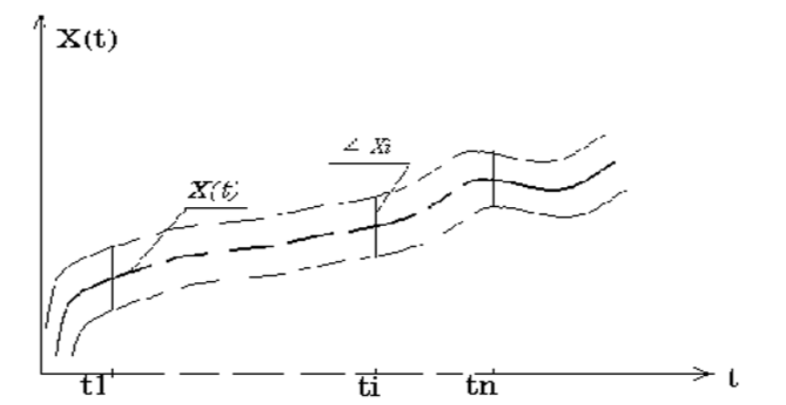
з катода;

</details>
</details>

Последовательность вида $X=[X_1,X_2\dots X_X]^T$ можно вероятностно описать с помощью многомерной плотности Распределения $\omega(x_1,\dots x_X) = \omega(x_1)\cdot\omega(x_2|x_1)\cdot\omega(x_3|x_2,x_1)\cdot \dots \omega(x_N|x_1\dots,x_{N-1})\cdot$
<p>
<details>
<summary>Вертикальная палка</summary>
Вертикальная палка в многомерной функции распределения вероятностей обозначает плотность вероятности. Она указывает на вероятность того, что случайная величина примет определённое значение при условии, что все остальные случайные величины приняли определённые значения. Или по русски - условная вероятность
</details>

Такая формулка быстро усложняется. Поэтому условные вероятности можно представить как безусловные в простейшем случае.

$$\omega(x_1,\dots x_X) = \prod_{i=1}^{N} \omega_i$$

Такую формулку можно применять когда все отсчёты независимы между собой.

Сделаем шаг вперёд и предположим что $x_i$ зависит только от $x_{i-1}$. такая последовательность - Марковская

$\omega(x_2|x_1) = \omega(x_2|x_1) $

$\omega(x_3|x_2, x_1) = \omega(x_3|x_2) $

$\dots$

$\omega(x_N|x_{N-1},\dots, x_1) = \omega(x_N|x_{N-1})$

И модель упрощается до $\omega(x_1,\dots x_X) = \omega(x_1)\prod_{i=2}^{N} \omega_i$



In [11]:
import numpy as np
import matplotlib.pyplot as plt

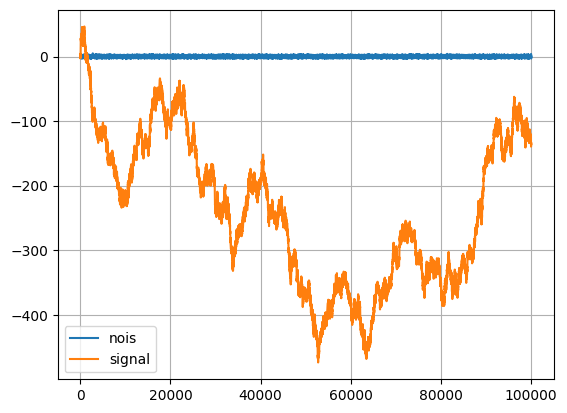

In [12]:
N = 100000
sigma = 1

fsignal = np.zeros(N)
fnoise = np.random.normal(0, sigma, N)
for i in range(1, N):
    fsignal[i] = fsignal[i-1] + fnoise[i]

plt.plot(fnoise)
plt.plot(fsignal)
plt.grid()
plt.legend(('nois', 'signal'))
plt.show()

Эта хрень может помочь определить место человека. Чтобы предсказать его следующее положение нужно знать где он сейча, а не где он был 10 минут назад. В формуле $x_i=x_{i-1}+\xi_i$

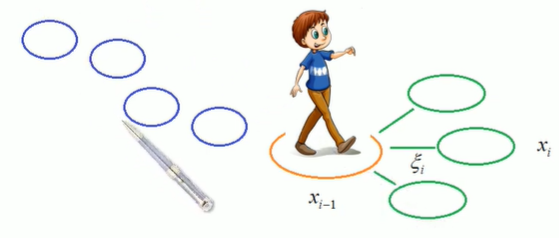

Таким образо условная вероятность определяется как 
$$\omega(x_i|x_{i-1})=\frac{1}{\sigma_\xi\sqrt{2\pi}}\exp\Bigl(-\frac{(x_i-x_{i-1})^2}{2\sigma_\xi} \Bigr)$$
$$\omega(x_i|x_{i-1})=\frac{1}{\sigma_\xi\sqrt{2\pi}}\exp\Bigl(-\frac{\xi^2}{2\sigma_\xi} \Bigr)$$

Но весь пиздец в деталях. В таком виде дисперсия случайного процесса бесконечно возрастает т.к. $x_i=\sum_{k=1}^{i}\xi_k$

Дисперсия N пропорционально увеличивается сумме дисперсий $\xi$ в формуле $\sigma_{x(N)}^2 = \sum_{i=1}^N\sigma_\xi^2$

Если мальчик только что вышел из квартиры, то через секунду он где то рядом с квартирой, а через час? а через час относительно квартиры он может быть в Казахстане. Чем дальше по времени, тем больше разброс. Для координат это нормально, но вот для скорость или ускорения это перебор. ПОэтому приветствуем

**Авторегрессия 1-го порядка**

$x_i=rx_{i-1}+\xi_i$ где $|r" < 1$

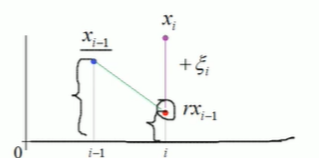

В фигурных скобках - дисперсия

$M\left<(rx_{i-1}+\xi)^2 \right> = r^2M\left\{ (x_{i-1})^2\right\} = r^2\cdot\sigma_x^2$ # разные скобки для примера

Коеф $r$ уменьшает дисперсию, а добавляя $\xi$ мы увеличиваем дисперсию обратно до значения которое было до этого

$\sigma_x^2=r^2\cdot\sigma_2^2+\sigma_\xi^2\Rightarrow\sigma_\xi^2=\sigma_x^2\cdot(1-r^2)$

Последняя формула - вычисление разброса случайной добавки

$$\omega(x_i|x_{i-1})=\frac{1}{\sigma_\xi\sqrt{2\Pi}$$

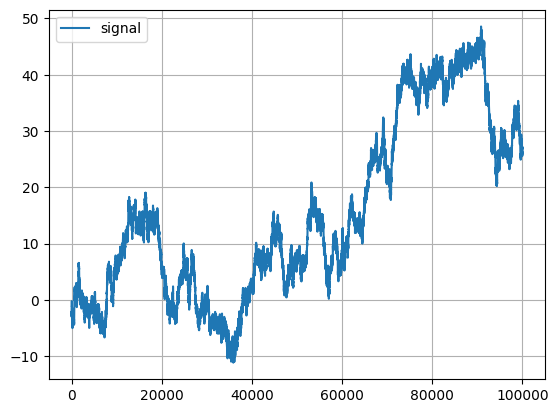

In [13]:
N = 100000 # с авторегрессией
sigma = 1
r = 0.99
en = np.sqrt((1 - r ** 2) * sigma ** 2)

fsignal = np.zeros(N)
fsignal[0] = np.random.normal(0, sigma)

for i in range(1, N):
    fsignal[i] = fsignal[i-1] + np.random.normal(0, en)


plt.plot(fsignal)
plt.grid()
plt.legend(('signal',))
plt.show()

Вернемся к определению координат. Например для самолёта

$$
\begin{equation}
\begin{cases}
x_i=x_{i-1}+\xi_x \\
y_i=y_{i-1}+\xi_y \\
z_i=z_{i-1}+\xi_z \\
\end{cases}
\end{equation}
$$

Сие неудобно. Поэтому что? Правильно, матрицы...

$$\begin{equation}
P^+= \left( \begin{array}{ccc}
1 & 0\\
0 & 0\end{array} \right)\qquad
P^-= \left( \begin{array}{ccc}
0 & 0\\
0 & 1\end{array} \right)
\end{equation}$$


Вернемся к определению координат. Например для самолёта

$$
\begin{equation}
\begin{cases}
x_i=x_{i-1}+\xi_x \\
y_i=y_{i-1}+\xi_y \\
z_i=z_{i-1}+\xi_z \\
\end{cases}
\end{equation}
$$

Сие неудобно. Поэтому что? Правильно, матрицы...

$$
\begin{equation}
\left[\begin{array}{ccc}
x_i\\
y_i\\
z_i
\end{array}\right]
=
\left[\begin{array}{ccc}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{array}\right]
\cdot
\left[\begin{array}{ccc}
x_{i-1}\\
y_{i-1}\\
z_{i-1}
\end{array}\right]
+
\left[\begin{array}{ccc}
\xi_{xi}\\
\xi_{yi}\\
\xi_{zi}
\end{array}\right]
\end{equation}
$$

Ну и канеш более правильная форма

$\overline{x}_i=R\cdot\overline{x}_{i-1}+\xi_i$

А если добавить скорости... в общим кси добавляем не к координате а к скорости

$$
\begin{equation}
\left[\begin{array}{ccc}
x_i\\
y_i\\
z_i\\
v_{xi}\\
v_{yi}\\
v_{zi}
\end{array}\right]
=
\left[\begin{array}{ccc}
1 & 0 & 0 & 1 & 0 & 0\\
0 & 1 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0 & 1\\
0 & 0 & 0 & r_x & 0 & 0\\
0 & 0 & 0 & 0 & r_y & 0\\
0 & 0 & 0 & 0 & 0 & r_z\\
\end{array}\right]
\cdot
\left[\begin{array}{ccc}
x_{i-1}\\
y_{i-1}\\
z_{i-1}\\
v_{xi-1}\\
v_{yi-1}\\
v_{zi-1}
\end{array}\right]
+
\left[\begin{array}{ccc}
0\\
0\\
0\\
\xi_{xi}\\
\xi_{yi}\\
\xi_{zi}
\end{array}\right]
\end{equation}
$$

Или как я уже говорил

$$
\begin{equation}
\begin{cases}
x_i=x_{i-1}+v_{xi-1}\\
v_{xi}=v_{xi-1}+\xi_{vxi}
\end{cases}
\end{equation}
$$

# Фильтр Калмана дискретного времени

# Байесовский принцип построения оценок
Оценка постоянного неизменяемого параметра $\theta$, например координата стоящего человека или дальности до объекта. Проблема - мы не знаем точной цифры, а имеем лишь наблюдения в отдельные моменты времени $y_1, y_2, \dots y_3$. Причём $y_k = \theta+n_k \quad\text{(где $n_k$ - шум)}$. Задача - придумать алгоритм который по наблюдениям $y_i$ определяет $\theta$. Получить точные значения нельзя, можно лишь получить приблизительные значения $\widehat{\theta}=u(\overline{y})$. $u$ - алгоритм.

Сначала определим критерий. Прицип его определения - чем меньше значение, тем лучше алгоритм - функция потерь (MSE, MAE). А еще и это не пределе, т.к. ошибки наблюдений постоянно разные, поэтому нужна такая, которая в среднем дает минимум функций потерь (мат. ожидание).

Строгая запись (т.к. речь о среднем, то имеем дело с мат. ожиданием).
$$\overline{R}(\varepsilon) = M\bigl\{R(\varepsilon)\bigr\}=\int_{-\infty}^{\infty}\dots\int_{-\infty}^{\infty}R\Bigl(\theta, \widehat{\theta}\Bigr)\omega(\theta, \overline{y})d\theta dy_1dy_2\dots dy_n$$

Многомерную плотность распредления вероятностей можно расписать так:

$$\omega(\theta, \overline{y}) = \omega(\theta\vert \overline{y})\cdot\omega(\overline{y})$$

$$\overline{R}(\varepsilon) = M\bigl\{R(\varepsilon)\bigr\}=\int_{-\infty}^{\infty}\dots\int_{-\infty}^{\infty}R\Bigl(\theta, \widehat{\theta}\Bigr)\omega(\theta\vert \overline{y})\cdot\omega(\overline{y})d\theta dy_1dy_2\dots dy_n$$

Разобьем интеграл на два:

$$R_a(\overline{y})=\int_{-\infty}^{\infty}R\Bigl(\theta, \widehat{\theta}\Bigr)\omega(\theta\vert \overline{y})d\theta$$

и тогда подставив его в исходный интеграл, получим:

$$\overline{R}(\varepsilon)\int_{-\infty}^{\infty}\dots\int_{-\infty}^{\infty}R_a(\overline{y})\omega(\overline{y})dy_1dy_2\dots dy_n$$

Из двух последних функций видно, что для поиска лучшей оценки $\theta$, нужно минимизировать $R_a(\overline{y})$, т.к. только в ней есть зависимоть от параметров, конкретно - условная плотность распределения $\omega(\theta\vert \overline{y})$

Оптимальная байесовская оценка, это такое значение параметра $\theta$, при котором функция $R_a(\overline{y})$ достигает своего минимума:

$$R_a(\overline{y})=\int_{-\infty}^{\infty}R\Bigl(\theta, \widehat{\theta}\Bigr)\omega(\theta\vert \overline{y})d\theta \rightarrow min$$

Это и есть критерий качества для построения байесовских оценок.

Пусть функция потерь - `квадратическая` (вместо $R_a(\overline{y})$ подставляется функция), тогда:

$$R_a(\overline{y})=\int_{-\infty}^{\infty}\Bigl(\theta - \widehat{\theta}\Bigr)^2\omega(\theta\vert \overline{y})d\theta$$

Дальшая старая песня, находим производную (по $d\theta$)$ и приравниваем нулю:

$$\frac{R_a(\overline{y})}{d\theta}=2\cdot\int_{-\infty}^{\infty}\Bigl(\theta - \widehat{\theta}\Bigr)\omega(\theta\vert \overline{y})=0$$

Разность распишем в виде двух интегралов:

$$\int_{-\infty}^{\infty}\theta\cdot\omega(\theta\vert \overline{y})-\widehat{\theta}\int_{-\infty}^{\infty}\omega(\theta\vert \overline{y})=0$$

А так как плотность распределения = 1:

$$\int_{-\infty}^{\infty}\theta\cdot\omega(\theta\vert \overline{y})-\widehat{\theta}=0$$

Откуда

$$\widehat{\theta}=\int_{-\infty}^{\infty}\theta\cdot\omega(\theta\vert \overline{y})$$

Таким образом при квадратической функции потерь, оптимальные байесовские оценки - центр тяжести плотности распределения вероятности

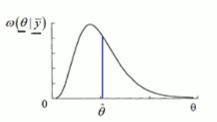

А если взять `простую` функцию потерь

$$R_a(\overline{y})=\int_{-\infty}^{\infty}-\delta\Bigl(\theta - \widehat{\theta}\Bigr)\omega(\theta\vert \overline{y})d\theta=-\omega(\theta\vert \overline{y})$$

Т.е. для оптимальной оценки нужно взять точку максимума плотности распределения вероятностей.

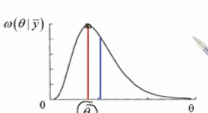

Из-за простоты вычислений обычно выбирают `простую` функцию потерь.

**Метод максимального правдоподобия**

Как же найти максимум. Для апостериорной вероятности (та,которая получена после результатов экспериментов):
$$\omega(\theta\vert \overline{y})\cdot\omega(\overline{y})=\omega(\overline{y}\vert\theta )\cdot\omega(\theta)$$

Откуда имеем:
$$\omega(\theta\vert \overline{y})=\frac{1}{\omega(\overline{y})}\cdot\omega(\overline{y}\vert\theta )\cdot\omega(\theta)$$

Чтобы получить максимум плотности распределения вероятности $\omega(\theta\vert \overline{y})$ при подбираемом параметре $\theta$ делаем следющее:
- отбрасываем первый множитель $\frac{1}{\omega(\overline{y})}$т.к. он константа и там мы ничего менять не можем
- последний множитель $\omega(\theta)$ представляет априрные сведения параметра $\theta$. Т.к. о природе его распределения зачастую ничего не известно, лучшее, что можно сделать - отбросить

Тогда апостериорная плотность распределения становится равной условной:
$$\omega(\theta\vert \overline{y})=\omega(\overline{y}\vert\theta )$$

Правую часть называют функцией правдоподобия $L(\theta)=\omega(\overline{y}\vert\theta )$, т.е. когда у нас нет сведений о распределении параметра $\theta$ и выбрана простая функция потерь, лучшая оценка соответствует максимому данной функции правдоподобия. Такая оценка $\widehat{\theta}=max L(\theta)$ получила название `оценка максимального правдоподобия`.

Для конкретизации этой формулу, предположим, что у нас есть аддитивный набор наблюдений. Предположим, что $y_k=\theta+n_k$ формируется на фоне шума, причем шум формируется по нормальному распределению $\omega(n_k)=\omega(y_k \vert \theta)=\frac{1}{\sigma\sqrt{2\pi}}exp(-\frac{(y_k-\theta)^2}{2\sigma^2})$, где мат. ожидание сама $\theta$. Тогда функция максимального правдоподдобия:
$$L(\theta)=\prod_{i=1}^{n}\omega(n_k)=\omega(y_i \vert \theta)=\frac{1}{\sigma\sqrt{2\pi}}exp(-\frac{1}{2\sigma^2}\cdot\sum_{i=1}^{n}(y_i-\theta)^2)$$

Откуда видно, что максимальное правдободобие будет достигнуто при минимальной степени $-\frac{1}{2\sigma^2}\cdot\sum_{i=1}^{n}(y_i-\theta)^2)\rightarrow min$. Точку минимума найдем продифференцировав это выражение по $\theta$. Отбросив константы, получим:
$$\sum_{i=1}^{n}(y_i-\theta))=0; \quad \sum_{i=1}^{n}y_i - \sum_{i=1}^{n}\theta=0; \quad n\cdot\theta=\sum_{i=1}^{n}y_i$$

Т.е. по методу максимального правдоподобия, оценка параметра $\theta$:
$$\widehat{\theta}=\frac{1}{n}\sum_{i=1}^{n}y_i$$
т.е. среднеарифметическое от наблюдений. Если шум коррелирован, то оценка изменится, данная формулка - частный случай

**Если известно распределение $\theta$**

Например нормальное распределение: 
$$\omega(\theta)=\frac{1}{\sigma\sqrt{2\pi}}exp(-\frac{(\theta-\theta_i)^2}{2\sigma^2})$$
Тогда оценку по максимальному правдоподобию можно уточнить. И тогда имеем апостериорную плотность распределения вероятности:
$$\omega(\theta\vert \overline{y})=\omega(\overline{y}\vert\theta )\cdot\omega(\theta)$$

Расписав это чудо:
$$\omega(\theta\vert \overline{y})=\frac{1}{\sigma_0(\sigma\sqrt{2\pi})^n}\cdot exp\Bigl\{-\frac{1}{2\sigma^2}\cdot\sum_{i=1}^{n}(y_i-\theta)^2 -\frac{1}{2\sigma_0^2}\cdot\sum_{i=1}^{n}(\theta-\theta_0)^2\Bigr\}$$

Максимум $\omega(\theta\vert \overline{y})$ будет достигаться при минимуме степени экспоненты:
$-\frac{1}{2\sigma^2}\cdot\sum_{i=1}^{n}(y_i-\theta)^2 -\frac{1}{2\sigma_0^2}\cdot\sum_{i=1}^{n}(\theta-\theta_0)^2\rightarrow min$

Дфференцируем, приравниваем нулю и:
$$\widehat{\theta}=\frac{\sigma_\varepsilon^2}{\sigma_\varepsilon^2+\sigma_0^2}\cdot\theta_0+\frac{\sigma_\varepsilon^2}{\sigma_\varepsilon^2+\sigma_0^2}\cdot\widehat{\theta}_{МП}$$
где $\sigma_\varepsilon^2=\frac{\sigma}{n}$ - дисперсия ошибки оценивания по максимому правдоподобия

Фактически тут просто отношение отклонений и берётся больше информации оттуда, где меньше отклонение. В формуле $\theta_0$ - из распределения, $\widehat{\theta}_{МП}$ из оценки. 

# Байесовский классификатор
Различение сигналов на основе критерия байеса. Пусть у нас есть наблюдение вида $\overline{y}=[y_1,y_2]^T$ - вес и рост человека. Определить пол ($S_0$ - женщина, $S_1$-мужчина). У нас есть априорные вероятности их появления $p_0=0.48$, $p_1=1-0.48=0.52$. В общем случаем мы не можем сказать имея наблюдения $[y_1,y_2]^T$ кому они принадлежат (из-за крайних значений, выбросов). На основании наблюдений можно выдвинуть лишь гипотезы:
- $H_0$ - женщина
- $H_1$ - мужчина

Мы можем как ошибиться, так и предсказать правильно:

</style>

<table>
 <tr>
 <th></th>
 <th>$H_0$</th>
 <th>$H_1$</th>
 </tr>
 <tr>
 <td>$S_0$</td>
 <td>True</td>
 <td>$P_M$</td>
 </tr>
 <tr>
 <td>$S_1$</td>
 <td>$P_F$</td>
 <td>True</td>
 </tr>
</table

Ошибка $P_M$ - в действительности женщина, а мы делаем вывод, что это женщина, $P_F$ - мужчину считаем за женщину (вероятности) - ошибки первого и второго рода

Распределение веса

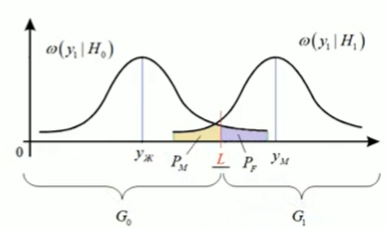

В зоне $G_0$ верна гипотеза $H_0$, В зоне $G_1$ верна гипотеза $H_1$. Или
$$y_i \in G_0 \rightarrow H_0 \quad y_i \in G_1 \rightarrow H_1$$
И наша цель определить границу. Вероятности ошибок:
$$P_M=\int_{G_0}\omega(y_i \vert H_1)dy \qquad \qquad P_F=\int_{G_1}\omega(y_i \vert H_0)dy$$
Или для $P_M$
$$P_M=1 - \int_{G_1}\omega(y_i \vert H_1)dy$$

В байесовском классификаторе каждой ошибке добавляется штраф: $R_0:P_F, \quad R_1:P_M$. Если хотим сильнее штрафовать за ложное обнаружение мужчин $F_M$, то $R_0>R_1$

Исходя из этого байесовский критерий определяется как минимум $\overline{R}=p_0R_0P_F+p_1R_1P_M$. Формально расписав этот критерий, получим:
$$\overline{R}=p_0R_0\int_{G_0}\omega(y_i \vert H_0)dy + p_1R_1\int_{G_1}\omega(y_i \vert H_1)dy$$
Проинтегрировав:
$$\overline{R}=p_1R_1-\int_{G_1}\bigl[ p_1R_1\omega(y_i \vert H_1) - p_0R_0\omega(y_i \vert H_0) \bigr]dy_i$$
Это же и для вектора наблюдений 
$$\overline{R}=p_1R_1-\int\dots\int_{G_1}\bigl[ p_1R_1\omega(\overline{y}_i \vert H_1) - p_0R_0\omega(\overline{y}_i \vert H_0) \bigr]d\overline{y}_i$$

Средние потери будут минимальны если интеграл принимает максимальные значения. Положительные значения интеграла будут когда $y_i \in G_1$ - точнее когда наблюдение стоит отнести к $G_1$:
$$p_1R_1\omega(\overline{y}_i \vert H_1) - p_0R_0\omega(\overline{y}_i \vert H_0) \geq 0$$

Иными словами, отношение вероятностей сравнивается с порогом из постериорной вероятности и штрафа:
$$\frac{\omega(\overline{y}_i \vert H_1)}{\omega(\overline{y}_i \vert H_0)} \geq \frac{p_0R_0}{p_1R_1}$$
В таком случае выдвигается гипотеза $H_1$>

Для кода (Л - левая часть последнего неравенства)

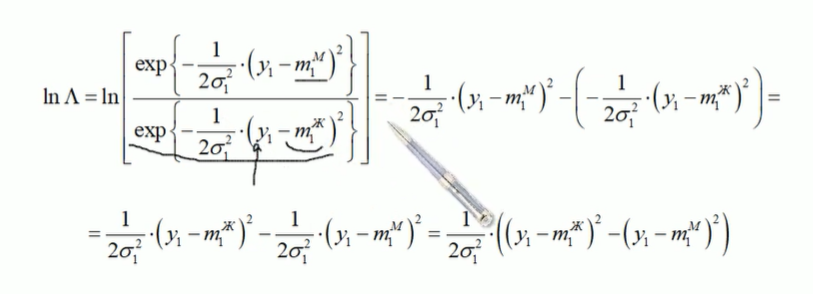

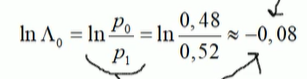

In [14]:
import numpy as np

In [58]:
%%time
def getL(y1, m1_F, m1_M, d1):
    res = 1/(2*d1)*((y1-m1_F)**2 - (y1-m1_M)**2)
    return res

def getL0(p0, p1):
    return np.log(p0/p1)

m1_F = 60   # средний вес женщин (кг)
m1_M = 85   # средний вес мужчин (кг)

d1 = 9     # дисперсия разброса веса (кг^2)

p0 = 0.48   # вероятность для женщин
p1 = 0.52   # вероятность для мужчин

N = 1000000     # число экспериментов

L0 = getL0(p0, p1)

nM = 0
for i in range(N):
    y1 = np.random.normal(m1_F, d1)

    L = getL(y1, m1_F, m1_M, d1)

    if(L >= L0):
        # print("Мужчина", y1)
        nM += 1
    # else:
    #     pass
        # print("Женщина", y1)

error = nM/N*100
print(f"Ошибка: {np.round(error, 2)}%")

Ошибка: 8.29%
CPU times: total: 1.77 s
Wall time: 1.79 s
